** Esta seção contempla noções básicas de Machine Learning com Scikit-Learn**

Referência: [http://scikit-learn.org/](http://scikit-learn.org/)

![scikit-learn](../images/scikit-learn.png)

(screeshot retirado em 10/2016)

### Objetivos da Seção

Ao final desta seção, você deve estar familiarizado com conceitos básicos de *Machine Learning* utilizando *Scikit-Learn*. Tais conceitos contemplam:
* Definir Machine Learning
* Como começar a trabalhar com dados usando Scikit-Learn
* Introduzir a API Scikit-Learn


### Afinal, o que é Machine Learning?

![mindmap](../images/mindmap.png)

Algoritmos de Machine Learning procuram **ajustar parâmetros** de maneira **generalizada**, baseando-se no comportamento de **dados já existente**.

A seguir, serão exemplificados 2 problemas mais comuns em Machine Learning.


### Exemplo 1: Classificação

Dado um conjunto **bi-dimensional**, onde as cores representam diferentes classes, um problema de *Classificação* pode ser utilizado para separar essas classes.

In [1]:
%matplotlib inline

# http://seaborn.pydata.org/
# Instanciaremos o seaborn com o seus parâmetros padrões.
import seaborn; seaborn.set()

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(
    n_samples=50,
    centers=2,
    random_state=0,
    cluster_std=0.60
)

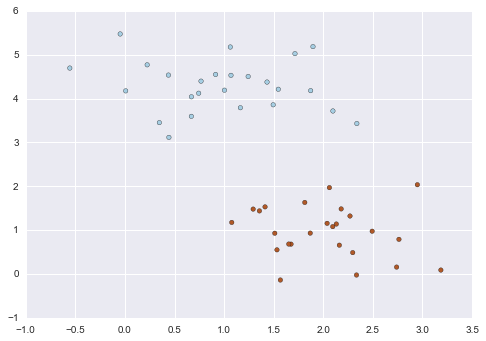

In [3]:
import matplotlib.pyplot as plt
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

In [4]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01,n_iter=200, fit_intercept=True)
clf.fit(X, Y)

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

(-1.3, 5.2999999999999998, -1.3240404974342852, 5.804850446119989)

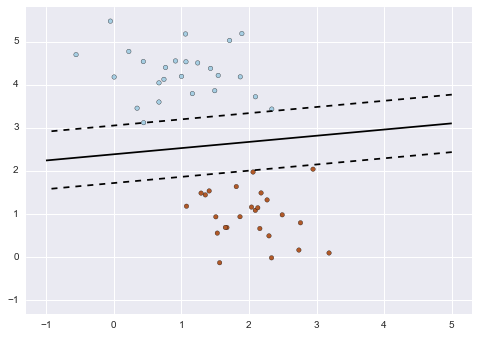

In [5]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function(np.array([[x1, x2]]))
    Z[i, j] = p[0]

levels = [-1.0, 0.0, 1.0]
colors = 'k'
linestyles = ['dashed', 'solid', 'dashed']
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)

ax.axis('tight')

Esta parece ser uma tarefa trivial, mas existe aqui um conceito importante.

Quando desenhamos esta linha que separa as cores, nós temos um modelo que generaliza para novos dados. Se nós posicionarmos um novo ponto, sem saber qual a cor, apenas pela posição saberíamos classificar entre vermelho ou azul.

In [6]:
# Para executar os passos anteriores com apenas um comando,
# basta retirar os comentários das próximas duas linhas.
#from fig_code import plot_sgd_separator
#plot_sgd_separator()

In [7]:
## Para visualizar o código que gera o gráfico anterior, 
## apenas retire o caracter '#' da próxima linha e execute esta célula
# %load fig_code/sgd_separator.py

### Exemplo 2: Regressão

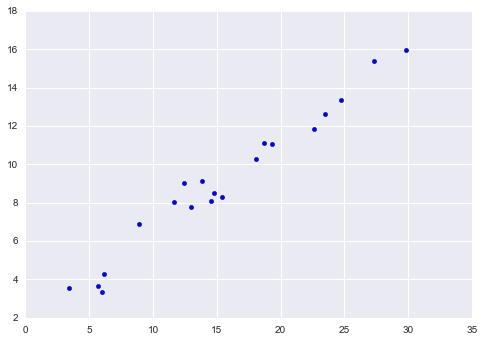

In [8]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

ax = plt.axes()
ax.scatter(x, y)

In [9]:
from sklearn.linear_model import LinearRegression
# create a linear regression classifier
clf = LinearRegression()
clf.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(-1.5, 31.5, 0.87932361145260496, 16.86191573338434)

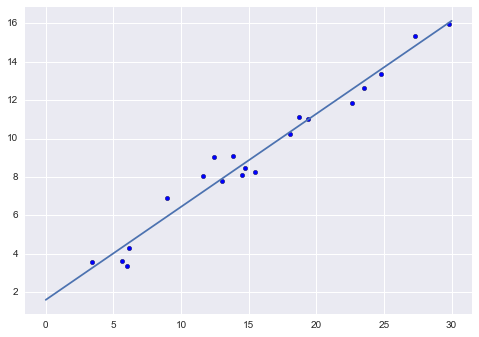

In [10]:
# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])

ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.axis('tight')

In [11]:
# Para executar os passos anteriores com apenas um comando,
# basta retirar os comentários das próximas duas linhas.
#from fig_code import plot_linear_regression
#plot_linear_regression()

### Representando dados com Scikit-Learn